Notebook Description:
This notbeook can train a new MLP Model.

Import all required packages for segmentation and model training

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

from skimage import segmentation, feature, future
from sklearn.neural_network import MLPClassifier
from functools import partial
from skimage.transform import resize
import joblib

Import custom modules for model training, evaluation metrics, image resizing, prediction, and post-processing

In [2]:
from ImageUtils import loadImages, displayPredictionOverRawEcoFab, sliceEcoFABs
from TrainMLPModel import featureExtraction, trainMLPModel
from SavingResults import saveResults, createResultsFolder

# 🔧 Training Stage

## Step 1: Load EcoFAB Training Images

In [3]:
# Load Raw EcoFABs
folder_path = "all images/raws/train" 
raw_images, raw_filenames = loadImages(folder_path)

# Load Corresponding Ground Truth Images
folder_path = "all images/binary gt/gt train"
gt, gt_filenames = loadImages(folder_path) 

Loading: (image 01) YY22EX0002EF007_S1-P4_20221202_11_30_EPSON copy.tif
Loading: (image 02) YY22EX0002EF019_S1-H3_20221202_14_27_EPSON copy.tif
Loading: (image 03) YY22EX0002EF026_S1-O3_20221202_15_07_EPSON copy.tif
Loading: (image 05) YY22EX0002EF027_S1-N2_20221202_15_37_EPSON copy.tif
Loading: (image 07) YY22EX0002EF006_S1-M2_20221202_11_21_EPSON.tif
Loading: (image 09) YY22EX0002EF010_S1-I1_20221202_12_06_EPSON copy.tif
Loading: (image 16) YY22EX0002EF005_S1-C4_20221202_11_13_EPSON copy.tif
Loading: (image 17) YY22EX0002EF038_S1-M4_20221202_17_10_EPSON copy.tif
Loading: (image 19) YY22EX0002EF029_S1-M1_20221202_16_46_EPSON copy.tif
Loading: (image 20) YY22EX0002EF003_S1-O1_20221202_10_57_EPSON.tif

Total images loaded: 10
Loading: (image 01, gt) YY22EX0002EF007_S1-P4_20221202_11_30_EPSON copy.tif
Loading: (image 02, gt) YY22EX0002EF019_S1-H3_20221202_14_27_EPSON copy.tif
Loading: (image 03, gt) YY22EX0002EF026_S1-O3_20221202_15_07_EPSON copy.tif
Loading: (image 05, gt) YY22EX0002EF0

## (Optional) Step 1a: Display EcoFAB Training Images

In [4]:
num = 0
raw_image = raw_images[num]
gt_image = gt[num]

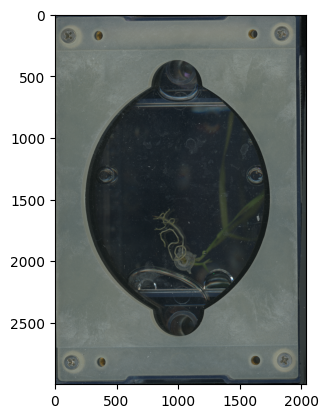

In [5]:
plt.imshow(raw_image)

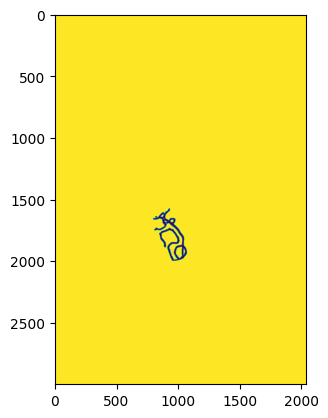

In [6]:
plt.imshow(gt_image==0)

## Step 2: Stack EcoFAB and Ground Truth Images for MLP Input

In [7]:
# Concatenate all training images and ground truths to meet MLP input requirements
concatenated_raw_images = np.vstack(raw_images)
concatenated_gt = np.vstack(gt)

## Step 3: Feature Extraction

In [8]:
# Define sigma values for feature extraction (controls blur intensity)
sigma_min = 1
sigma_max = 4

In [9]:
# Feature extraction for 10 EcoFABs (~120 seconds total)
training_features = featureExtraction(sigma_min, sigma_max, concatenated_raw_images)

🌱 Extracting Multiscale Features from EcoFAB Training Images...
✅ Task Completed Successfully!


## Step 4: Define MLP Hyperparameters

In [10]:
mlp_parameters = MLPClassifier(
    activation='relu',
    alpha=0.0001,
    hidden_layer_sizes=(40,),
    learning_rate='constant',
    max_iter=150,
    random_state=42
)

## Step 5: Train MLP Model

In [ ]:
# Train MLP Model using 10 Testing Images (~790 seconds total)
mlp = trainMLPModel(concatenated_gt, training_features, mlp_parameters)

Training initialized...


# 🤖 Prediction Stage

## Step 1: Load EcoFAB Testing Images¶

In [ ]:
# Load Raw EcoFABs
folder_path = "all images/raws/test/batch 1" 
new_ecoFABs, new_filenames = loadImages(folder_path)

## Step 2: Stack EcoFABs for Fast Predictions

In [ ]:
combined_ecofabs = np.vstack(new_ecoFABs)

## Step 3: Feature Extraction

In [ ]:
# Feature extraction for 10 EcoFABs (~117 seconds total)
ecofab_features = featureExtraction(1, 4, combined_ecofabs)

## Step 4: Predict Unseen EcoFABs

In [ ]:
# Predict New EcoFABs (~135 seconds total)
root_pred = future.predict_segmenter(ecofab_features, mlp)

## Step 5: Slice Individual Predictions

In [ ]:
# Slice Root Predictions
ecoFAB_predictions = sliceEcoFABs(root_pred, 10)

## Step 6: Download Predictions

In [ ]:
pred_folder = createResultsFolder()
saveResults(ecoFAB_predictions, new_filenames, pred_folder)

## (Optional) Step 7: Download MLP Model for later use

In [ ]:
model_name = "MLP Model 1"

In [ ]:
folder = "saved_models"
filepath = os.path.join(folder, model_name)

# Create folder if it doesn't exist
os.makedirs(folder, exist_ok=True)

start = time.time()
joblib.dump(mlp, model_name)
